In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

# Ground Cricket Chirps

In [27]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


Instantiate a LinearRegression object:

In [3]:
regr = linear_model.LinearRegression()

Define variables. x = feature, y = response

In [4]:
X = df['Ground Temperature']
X = X.to_frame()

In [5]:
y = df['Chirps/Second']

Fit linear model to data.

In [6]:
regr.fit(X, y)

/Users/kathrynjackson/Code/homework/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Simple Linear Regression Equation
y = β<sub>0</sub> + β<sub>1</sub> x<br>
<br>
y = response = df['Chirps/Second']<br>
x = feature = dr['Ground Temperature']<br>
β<sub>0</sub> = intercept = 0.459314645236<br>
β<sub>1</sub> = coefficient = 0.20299973

### Two ways to plot linear regression

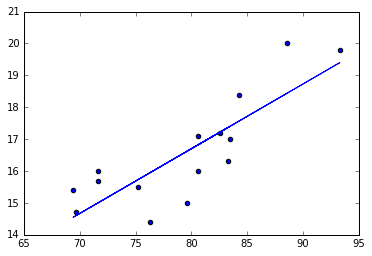

In [7]:
plt.scatter(X, y)
plt.plot(X, (regr.intercept_ + (regr.coef_ * X)))
plt.show()

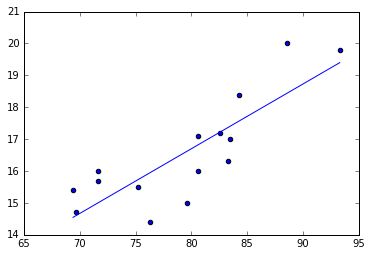

In [8]:
df_new = pd.DataFrame({'Ground Temp': [df['Ground Temperature'].min(), df['Ground Temperature'].max()]})

plt.scatter(X, y)
plt.plot(df_new, regr.predict(df_new))
plt.show()

### R<sup>2</sup> Score

In [9]:
regr.score(X, y)

0.69229465291469983

The R<sup>2</sup> score (or  coefficient of determination) for this linear regression is 0.69. This is not a great score.

### Extrapolate

In [10]:
regr.predict(95)

array([ 19.74428913])

According to this linear regression model, a ground temperature of 95°F would result in an expected rate of 19.74 chirps per second.

### Interpolate
I used the intercept and coefficient to manually calculate an interpolation.

In [11]:
(18 - regr.intercept_) / regr.coef_

array([ 86.40743135])

According to this linear regression model, a chirping rate of 18 would imply an approximate ground temperature of 86.4°F.

# Brain vs. Body Weight

In [12]:
bb = pd.read_fwf('brain_body.txt')
bb.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


Instantiate the LinearRegression class.

In [13]:
bb_regr = linear_model.LinearRegression()

Set variables. X = feature = brain size; y = response = body size

In [14]:
X = bb['Brain'].to_frame()
y = bb['Body']

Fit linear model to data. Find elements of linear regression equation.

In [15]:
bb_regr.fit(X, y)
print(bb_regr.intercept_, bb_regr.coef_)

91.0043962074 [ 0.96649637]


### Simple Linear Regression Equation
y = β<sub>0</sub> + β<sub>1</sub> x<br>
<br>
y = response = bb['Body']<br>
x = feature = bb['Brain']<br>
β<sub>0</sub> = intercept = 91.0043962074<br>
β<sub>1</sub> = coefficient = 0.96649637

### Plot Data with Linear Regression Equation

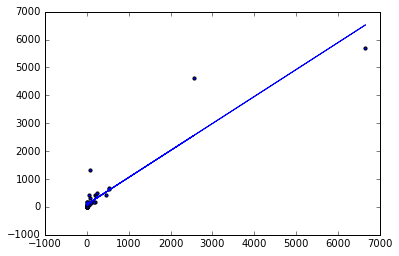

In [16]:
plt.scatter(X, y, s=10)
plt.plot(X, (bb_regr.intercept_ + (bb_regr.coef_ * X)))
plt.show()

### R<sup>2</sup> Score

In [17]:
bb_regr.score(X, y)

0.87266208430433312

The R<sup>2</sup> score (or  coefficient of determination) for this linear regression is 0.87. This is a strong correlation, suggesting that the linear regression will be a good predictor of future data. 

# Salary Discrimination

In [18]:
sd = pd.read_fwf("salary.txt", header=None,
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
sd.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


Instantiate the LinearRegression class.

In [19]:
sd_regr = linear_model.LinearRegression()

Set variables.

In [20]:
feature_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
X = sd[feature_cols]
y = sd['Salary']

Fit linear model to data. Find elements of linear regression equation.

In [21]:
sd_regr.fit(X, y)
print(sd_regr.intercept_, sd_regr.coef_)

11410.1465473 [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354]


### Multiple Linear Regression Equation
y = β<sub>0</sub> + β<sub>1</sub> x +...+β<sub>n</sub> x<sub>n</sub><br>
<br>
y = response = sd['Salary']<br>
x = feature = sd[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]<br>
β<sub>0</sub> = intercept = 11410.1465473<br>
β<sub>1</sub> = coefficient<sub>Sex</sub> = 1241.7924996<br>
β<sub>2</sub> = coefficient<sub>Rank</sub> = 5586.18144952<br>
β<sub>3</sub> = coefficient<sub>Year</sub> = 482.85976783<br>
β<sub>4</sub> = coefficient<sub>Degree</sub> = -1331.64406341<br>
β<sub>5</sub> = coefficient<sub>YSdeg</sub> = -128.79057354<br>

In [22]:
list(zip(feature_cols, sd_regr.coef_))

[('Sex', 1241.7924996014231),
 ('Rank', 5586.1814495214376),
 ('Year', 482.85976782882136),
 ('Degree', -1331.6440634059163),
 ('YSdeg', -128.79057354486233)]

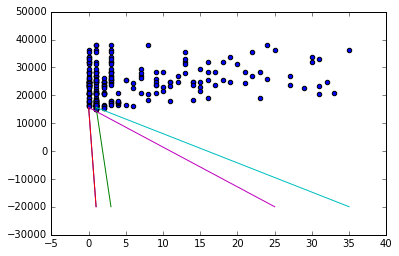

In [23]:
df_new = pd.DataFrame({'Sex': [sd['Sex'].min(), sd['Sex'].max()], 'Rank': [sd['Rank'].min(), sd['Rank'].max()],
                       'Year': [sd['Year'].min(), sd['Year'].max()], 'Degree': [sd['Degree'].min(), sd['Degree'].max()],
                       'YSDeg': [sd['YSdeg'].min(), sd['YSdeg'].max()]})

for x in feature_cols:
    plt.scatter(sd[x].to_frame(), y)

plt.plot(df_new, sd_regr.predict(df_new))
plt.show()

### R<sup>2</sup> score for each feature
The following loop finds the linear regression and calculates the R<sup>2</sup> score for each feature. Rank has the strongest relationship to salary.

In [24]:
for x in feature_cols:
    x_regr = linear_model.LinearRegression()
    x_regr.fit(sd[x].to_frame(), sd['Salary'])
    r2 = x_regr.score(sd[x].to_frame(), sd['Salary'])
    print('r2 for {} = {}'.format(x, r2))

r2 for Sex = 0.06389892583288004
r2 for Rank = 0.7525360539274631
r2 for Year = 0.49093702676921624
r2 for Degree = 0.004861680984748374
r2 for YSdeg = 0.45542813458360276


### Each feature vs. response plotted
Looking at the following 5 plots, it is clear that Rank and Year have fairly strong correlations.

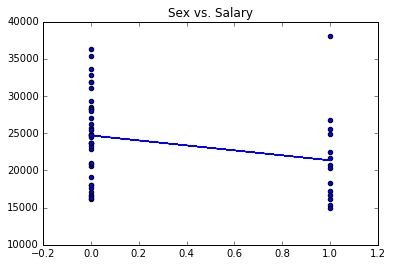

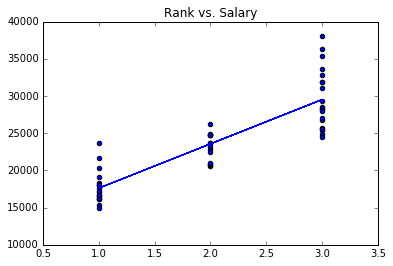

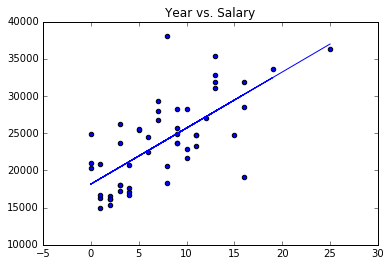

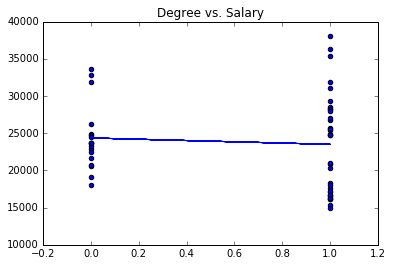

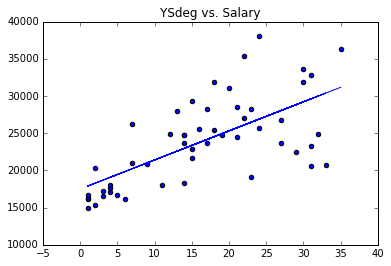

In [25]:
for x in feature_cols:
    x_regr = linear_model.LinearRegression()
    x_regr.fit(sd[x].to_frame(), sd['Salary'])

    plt.scatter(sd[x], sd['Salary'])
    plt.plot(sd[x], (x_regr.intercept_ + (x_regr.coef_ * sd[x])))

    plt.title("{} vs. Salary".format(x))
    plt.show()

I made a 3D graph using sex and rank as features, but it doesn't tell me anything.

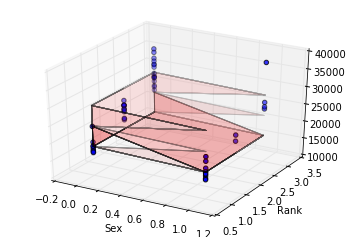

In [26]:
input_data = sd[['Sex', 'Rank']]
output_data = sd['Salary']

b_regr = linear_model.LinearRegression()
b_regr.fit(input_data, sd['Salary'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xx = input_data['Sex']
yy = input_data['Rank']
zz = output_data

predict = b_regr.predict(input_data)
x_surf, y_surf = np.meshgrid(xx, yy)

ax.plot_surface(x_surf, y_surf, predict, color='red', alpha=0.1)
ax.scatter(xx, yy, zz)

plt.xlabel('Sex')
plt.ylabel('Rank')

## Findings
Although there appears to be a visual correlation between sex and salary, the relationship between rank and salary is much stronger. I have a feeling the data is tricky to visualize because of the variables that use binary values as codes.